In [1]:
from sklearn import tree    # 导入库
from sklearn.model_selection import train_test_split    # 划分训练集和测试集
from sklearn.datasets import load_wine    # 导入红酒数据

In [2]:
wine = load_wine()    # wine赋值红酒数据
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target    # 目标分类，012共三个分类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
import pandas as pd 

In [6]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3,shuffle = True)    # 创建训练集和测试集数据

In [28]:
clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth= 4 )    # 这里是核心，采用基尼系数来计算不纯度
# 最大深度：max_depth  剪枝：min_samples_leaf & min_samples_split

In [29]:
clf = clf.fit(x_train,y_train)    # 训练数据导入，训练模型

In [30]:
score = clf.score(x_test,y_test)     # 导入测试集，查看模型分数
score

0.8703703703703703

In [31]:
import graphviz    # 导入画图工具

In [32]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=['琴酒','雪莉','贝尔摩德']    # 目标名称
                                ,filled=True    # 加颜色
                                ,rounded=True    # 圆角的图
                               )
graph = graphviz.Source(dot_data)

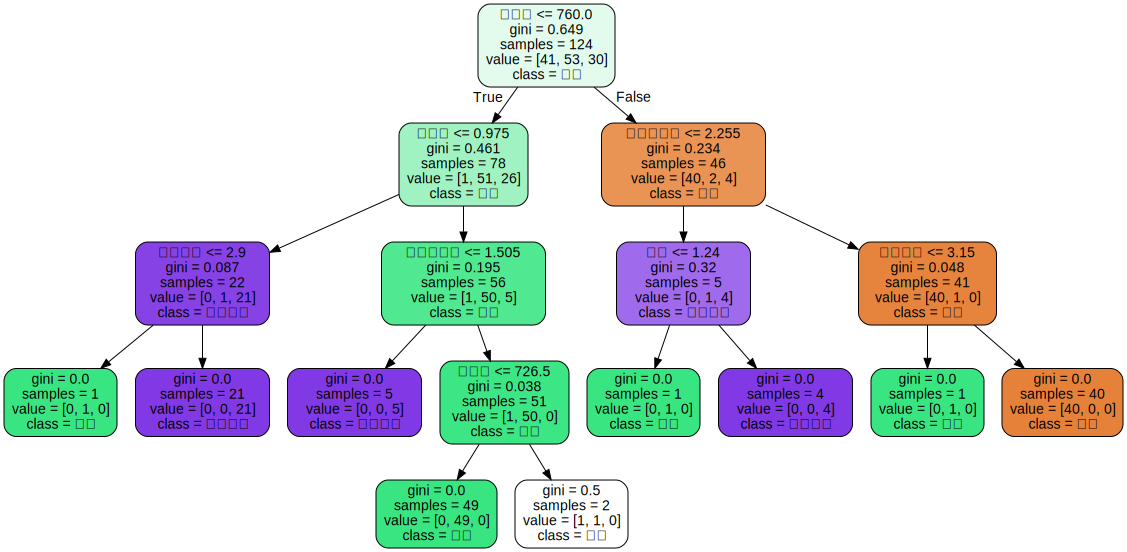

In [33]:
graph

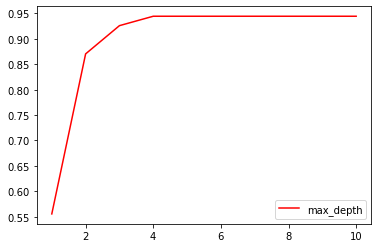

In [34]:
# 看看最大深度和模型拟合度的匹配程度
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i + 1 
                                     ,criterion="gini"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [35]:
road = 'D:\奥里\机器学习数据\决策树.xlsx'

In [36]:
data = pd.read_excel(road)

In [38]:
data.replace({'是':1,'否':0,'未婚':0,'结婚':1,'离婚':2},inplace = True)

In [40]:
data

,用户ID,贷款金额,是否有房产,婚姻状况,年收入,是否还款
0,1,39568,0,2,77791,1
1,2,49537,1,1,64578,1
2,3,45641,1,2,86374,1
3,4,39910,1,2,99221,1
4,5,47278,1,1,71989,1
...,...,...,...,...,...,...
3519,3520,52498,1,2,63631,0
3520,3521,41316,0,1,91137,0
3521,3522,62827,0,0,62701,0
3522,3523,61470,1,2,83705,1


In [41]:
data_train = data.iloc[:,:5]

In [42]:
data_target = data.iloc[:,-1:]

In [45]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEXT = train_test_split(data_train,data_target,test_size=0.3,shuffle=True)

In [52]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)

In [53]:
clf = clf.fit(X_TRAIN,Y_TRAIN)

In [54]:
score = clf.score(X_TEST,Y_TEXT)

In [55]:
score

0.775047258979206

In [56]:
photo = tree.export_graphviz(clf
                             ,feature_names=['用户ID','贷款金额','是否有房产','婚姻状况','年收入']
                             ,class_names=['已归还','逾期']
                            ,filled=True
                            ,rounded=True)
photo2 = graphviz.Source(photo)

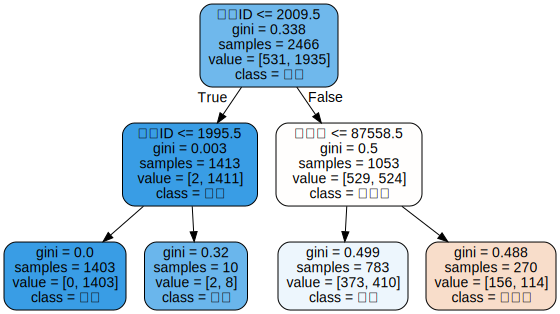

In [57]:
photo2 

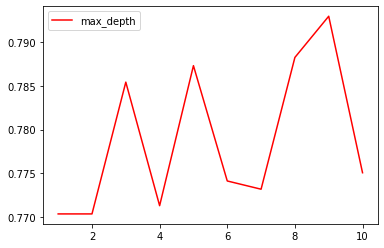

In [73]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i + 1 
                                     ,criterion="gini"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(X_TRAIN, Y_TRAIN)
    score = clf.score(X_TEST, Y_TEXT)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [59]:
d1 = data_train

In [60]:
d2 = data_target

In [61]:
x_train,x_test,y_train,y_test = train_test_split(d1,d2,test_size=0.3,shuffle=True)

In [62]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)

In [63]:
clf = clf.fit(x_train,y_train)

In [64]:
score = clf.score(x_test,y_test)

In [65]:
score

0.775992438563327

In [66]:
photo_ini = tree.export_graphviz(clf
                                ,feature_names = ['用户ID','贷款金额','是否有房产','婚姻状况','年收入']
                                ,class_names= ['已还款','未还款']
                                ,filled = True
                                ,rounded = True)

In [67]:
photo_vis = graphviz.Source(photo_ini)

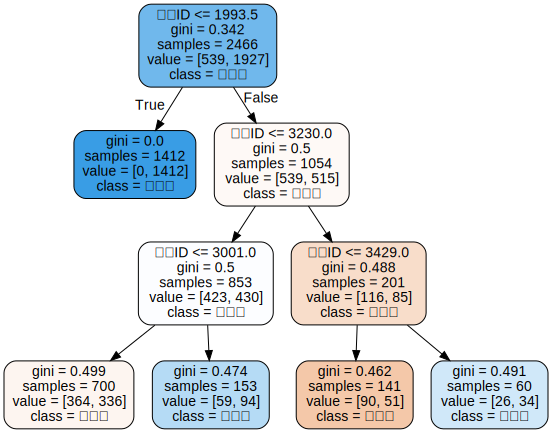

In [68]:
photo_vis

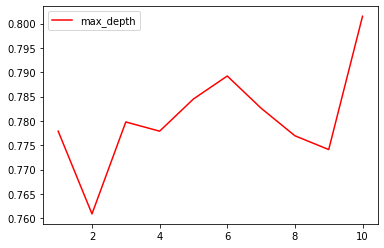

In [71]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i + 1 
                                     ,criterion="gini"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test,y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()